### **Step 2: Pre-processing**

In [4]:
# Import thr required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re  # Import Regular expression operations library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


In [5]:
# Load the file and display the first 2 rows
df =pd.read_csv('cleaned_df.csv')
df.head(2)

,label,text,description_length,word_count
0,Psoriasis,I have been experiencing a skin rash on my arm...,141,28
1,Psoriasis,"My skin has been peeling, especially on my kne...",138,23


In [6]:
df.shape

(1153, 4)

In [7]:
# Download the NLTK's stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CFS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### I have decided to customize the stopwords because my dataset contains many words that are not relevant to the disease.
##### Also I am removing the last 100 most common words from the words list because they occur only once and they have no relevancy to the diseases.


In [37]:
# Initialize lemmatizer 
lemmatizer = WordNetLemmatizer()

english_stopwords = set(stopwords.words('english'))

# Customize stopwords ( apart from stopwords there are other words that are not useful for predictions and that appear only once)
custom_stopwords = ["feeling", "also", "lot", "get", "like", "recently", "really", "experiencing", "feel", "quite", "time", "additionally","since",
                   "zone", "generate", "fully", "show", "showing", "frustrated", "sickly", "frantically", "fragrance","similar", "skill", 
                    "sky", "following", "gnawing", "illness", "scarcely", "horribly", "sclap", "helping", "hello", "hell","poorly", "popping", 
                   "heated", "harder","hearbeat", "happened", "heap", "government", "practically", "dont", "yet", "quick", "bothersome","thiis", "these",
                   "three", "contain", "contains", "spirit", "pressured", "prevents", "problematic","pressed", "powder", "produce", "decline", "decrease",
                   "deep", "delicate", "presence", "stain","continious", "product", "gloomy", "focused", "continued", "thanks", "fluctuation", "crease",
                    "coordination", "copious", "persistant", "fold", "persitent", "position", "flushing", "pine"]

# Add words from the tail of word_freq
words_to_add = word_freq.sort_values(ascending=False).tail(100).index.tolist()
custom_stopwords.extend(words_to_add)


english_stopwords.update(custom_stopwords)


In [38]:
def preprocess(sentence):
    # Convert sentence to string and to lower case
    sentence = str(sentence).lower()

    # Replace HTML tags with empty strings
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    
    # Remove URLs and numbers
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    # Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    
    # Filter out the stop words
    filtered_words = [w for w in tokens if w not in english_stopwords]
    
    # Lemmatization
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    
    return " ".join(lemma_words)


In [39]:
df['preprocessed_text'] = df['text'].map(lambda s: preprocess(s))


In [40]:
# Count the number of words using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])

# Convert to a DataFrame and sum each column for word frequencies
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum()

In [42]:
# Display the most common words
print(word_freq.sort_values(ascending=False).head(20))


skin          365
pain          306
fever         233
rash          194
high          189
headache      188
neck          172
chest         146
cough         143
hurt          138
muscle        128
throat        127
sore          116
red           114
body          109
severe        109
back           97
itching        96
discomfort     95
weak           93
dtype: int64


In [43]:
df.head()

,label,text,description_length,word_count,preprocessed_text
0,Psoriasis,I have been experiencing a skin rash on my arm...,141,28,skin rash arm leg torso past week red itchy co...
1,Psoriasis,"My skin has been peeling, especially on my kne...",138,23,skin peeling especially knee elbow scalp peeli...
2,Psoriasis,I have been experiencing joint pain in my fing...,148,28,joint pain finger wrist knee pain often achy t...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",164,32,silver dusting skin especially lower back scal...
4,Psoriasis,"My nails have small dents or pits in them, and...",140,27,nail small dent pit often inflammatory tender ...


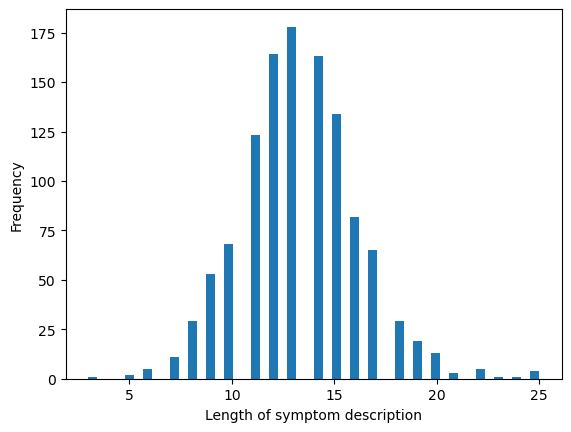

In [44]:
# Plot a histogram of the length of the symptom descriptions
plt.hist(df['preprocessed_text'].apply(lambda x: len(x.split())), bins=50)
plt.xlabel('Length of symptom description')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Print the number of unique words
print("Number of unique words:", len(word_freq))

Number of unique words: 1196


In [46]:
# Encode label column
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
encoder = LabelEncoder() 

# Fit the encoder to the labels and transform the labels
df['Label_encoded'] = encoder.fit_transform(df['label'])


In [47]:
print(encoder.classes_)


['Acne' 'Arthritis' 'Bronchial Asthma' 'Cervical spondylosis'
 'Chicken pox' 'Common Cold' 'Dengue' 'Dimorphic Hemorrhoids'
 'Fungal infection' 'Hypertension' 'Impetigo' 'Jaundice' 'Malaria'
 'Migraine' 'Pneumonia' 'Psoriasis' 'Typhoid' 'Varicose Veins' 'allergy'
 'diabetes' 'drug reaction' 'gastroesophageal reflux disease'
 'peptic ulcer disease' 'urinary tract infection']


In [48]:
# Print Label names and the corresponding label number
print(df[['label', 'Label_encoded']].head(10))


       label  Label_encoded
0  Psoriasis             15
1  Psoriasis             15
2  Psoriasis             15
3  Psoriasis             15
4  Psoriasis             15
5  Psoriasis             15
6  Psoriasis             15
7  Psoriasis             15
8  Psoriasis             15
9  Psoriasis             15


In [49]:
# Save LabelEncoder
import joblib
joblib.dump(encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [50]:
df.head()

,label,text,description_length,word_count,preprocessed_text,Label_encoded
0,Psoriasis,I have been experiencing a skin rash on my arm...,141,28,skin rash arm leg torso past week red itchy co...,15
1,Psoriasis,"My skin has been peeling, especially on my kne...",138,23,skin peeling especially knee elbow scalp peeli...,15
2,Psoriasis,I have been experiencing joint pain in my fing...,148,28,joint pain finger wrist knee pain often achy t...,15
3,Psoriasis,"There is a silver like dusting on my skin, esp...",164,32,silver dusting skin especially lower back scal...,15
4,Psoriasis,"My nails have small dents or pits in them, and...",140,27,nail small dent pit often inflammatory tender ...,15


In [51]:
# Save the pre-processed dataframe as a csv file
df.to_csv('processed_data.csv', index=False)

In [52]:
df.shape

(1153, 6)